# Word Cloud Project: Email Spam Classification

Welcome to the "Word Cloud" project! In this project, we'll be working with Email Spam classification data, performing General Exploratory Data Analysis (EDA), and cleaning the text data. The final step involves generating a Word Cloud to visualize key words in the dataset.

## Project Overview

### Dataset
We will be using a dataset containing email messages labeled as spam or non-spam. The goal is to build a Word Cloud that highlights frequent words in both spam and non-spam emails.

### Project Steps

1. **Data Exploration:**
   - Investigate the structure and characteristics of the email dataset.
   - Explore the distribution of spam and non-spam emails.

2. **Text Cleaning:**
   - Preprocess the text data to remove noise and irrelevant information.
   - Handle any missing or inconsistent data.

3. **Word Cloud Generation:**
   - Create a Word Cloud for both spam and non-spam emails.
   - Visualize the most frequent words in each category.

---


In [36]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
#Read the data set
df = pd.read_csv("Input_data\spam.csv")
print(df.shape)
print('')
df.head()

(5572, 2)



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#Looking at distruibution of target variable for imbalance check
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [39]:
df['spam_flag'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

df.spam_flag.value_counts()

spam_flag
0    4825
1     747
Name: count, dtype: int64

In [40]:
#Removing duplicates from data if any
print(df.shape)
df = df.drop_duplicates()
print('')
print(df.shape)

(5572, 3)

(5157, 3)


In [41]:
df.head()

,Category,Message,spam_flag
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [42]:
import pandas as pd

# Assuming 'df' is your DataFrame
clean_desc = []

for index, row in df.iterrows():
    desc = row['Message'].lower()

    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)

    clean_desc.append(desc)


In [43]:
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc

df.head(3)

,Category,Message,spam_flag,text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...


In [44]:
stop_words = ['u','is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 
              'in', 'im', 'have', 'on', 're', 'new', 'subject','name','so','he','she','say','until','go','its']

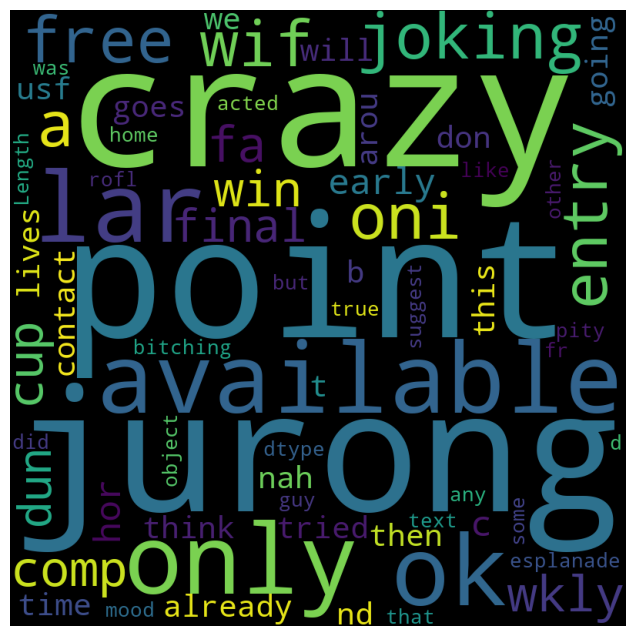

In [45]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                    , min_font_size = 20).generate(str(df['text']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()